Name: Kieran Fitzmaurice

# Radioactive Decay Chain

(Adapted from textbook exercise 10.2)

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and half-lives thus:
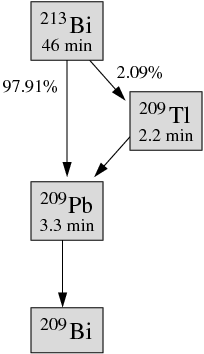
(Technically, $^{209}$Bi isn't really stable, but it has a half-life of more than $10^{19}$ years, a billion times the age of the universe, so it might as well be.)

Starting with a sample consisting of $10\,000$ atoms of $^{213}$Bi, simulate the decay of the atoms as in textbook Example 10.1 by dividing time into slices of length $\Delta t=1\,$s each and on each step doing the following:
1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability of this is $$p(t)=1-2^{-t/\tau}\,,$$ as derived in the text.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.
2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.
3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top, to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for $20\,000$ seconds and make a single graph showing the four numbers as a function of time on the same axes.

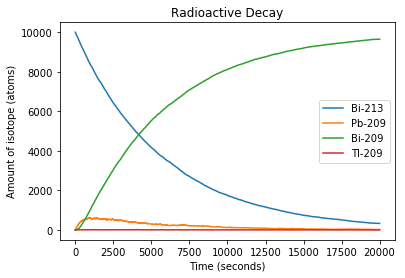

In [67]:
import numpy as np
import matplotlib.pyplot as plt

class isotope:
    def __init__(self,amount,halflife):
        self.amount = amount        #number of atoms of this isotope
        self.halflife = halflife    #half life in seconds

def compute_decays(dt,isotope):
    chance = np.random.rand(isotope.amount)
    tau = (isotope.halflife)/(np.log(2))
    prob = 1 - 2**(-dt/tau)
    numdecay = (chance < prob).sum()
    return(numdecay)

timesteps = 20000
dt = 1

Bi_213 = isotope(10000,46*60)   #start with just Bi-213 isotope           
Pb_209 = isotope(0,3.3*60)            
Bi_209 = isotope(0,1.9e19*365.25*24*60*60) 
Tl_209 = isotope(0,2.2*60)   

amount_Bi_213 = np.zeros(timesteps)
amount_Pb_209 = np.zeros(timesteps)
amount_Bi_209 = np.zeros(timesteps)
amount_Tl_209 = np.zeros(timesteps)  


for t in range(0,timesteps):
    
    #initialize
    
    loss_Bi_213 = 0
    gain_Bi_213 = 0
    loss_Pb_209 = 0
    gain_Pb_209 = 0
    loss_Bi_209 = 0
    gain_Bi_209 = 0
    loss_Tl_209 = 0
    
    #store amounts of each isotope
    
    amount_Bi_213[t] = Bi_213.amount       
    amount_Pb_209[t] = Pb_209.amount
    amount_Bi_209[t] = Bi_209.amount
    amount_Tl_209[t] = Tl_209.amount
    
    #look at how much Pb-209 decays
    
    loss_Pb_209 = compute_decays(dt,Pb_209) 
    gain_Bi_209 = loss_Pb_209
    
    #look at how much Tl-209 decays
    
    loss_Tl_209 = compute_decays(dt,Tl_209) 
    gain_Pb_209 = loss_Tl_209
    
    #look at how much Bi-213 decays by each route
    
    loss_Bi_213 = compute_decays(dt,Bi_213) 
    prob = 0.9791                          
    chance = np.random.rand(loss_Bi_213)
    numdecay = (chance < prob).sum()
    gain_Pb_209 = gain_Pb_209 + numdecay 
    gain_Tl_209 = loss_Bi_213 - numdecay 
    
    #update amounts
                                           
    Bi_213.amount = Bi_213.amount - loss_Bi_213 + gain_Bi_213
    Pb_209.amount = Pb_209.amount - loss_Pb_209 + gain_Pb_209
    Bi_209.amount = Bi_209.amount - loss_Bi_209 + gain_Bi_209
    Tl_209.amount = Tl_209.amount - loss_Tl_209 + gain_Tl_209
    
    loss = np.array([loss_Bi_213,loss_Pb_209,loss_Bi_209,loss_Tl_209])
    gain = np.array([gain_Bi_213,gain_Pb_209,gain_Bi_209,gain_Tl_209])

time = range(0,timesteps)
plt.plot(time,amount_Bi_213,time,amount_Pb_209,time,amount_Bi_209,time,amount_Tl_209)
plt.legend(["Bi-213","Pb-209","Bi-209","Tl-209"])
plt.xlabel("Time (seconds)")
plt.ylabel("Amount of isotope (atoms)")
plt.title("Radioactive Decay")
plt.show()

# Brownian Motion

(Adapted from textbook exercise 10.3)

Brownian motion is the motion of a particle, such as a smoke or dust particle, in a gas, as it is buffeted by random collisions with gas molecules. Make a simple computer simulation of such a particle in two dimensions as follows. The particle is confined to a square grid or lattice $L\times L$ squares on a side, so that its position can be represented by two integers $i,j = 0\ldots L-1$. It starts in the middle of the grid. On each step of the simulation, choose a random direction - up, down, left, or right - and move the particle one step in that direction. This process is called a random walk. The particle is not allowed to move outside the limits of the lattice - if it tries to do so, choose a new random direction to move in.

Write a program to perform 2000 steps of this process on a lattice with $L=51$ and make an animation that plots the position of the particle at each step. (We choose an odd length for the side of the square so that there is one lattice site exactly in the center.)

In [68]:
%reset -f

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random

L = 51
timesteps = 2000

positions = np.zeros((timesteps,2))
pos = np.array([int(L/2),int(L/2)])


options = np.array([[0,1],[0,-1],[1,0],[-1,0]]) #potential displacements

for t in range(0,timesteps):
    positions[t] = pos
    good = False
    
    while(good == False):
        move = random.choice(options)
        newpos = pos + move
        if newpos[0] >= 0 and newpos[0] <= 51 and newpos[1] >= 0 and newpos[1] <= 51:
            good = True
            pos = newpos

fig, ax = plt.subplots()

def animate(frame):
    x,y = positions[frame]
    ax.clear()
    p = plt.Circle((x,y),radius = 0.5,color = 'r')
    ax.add_patch(p)
    ax.set_xlim([0,51])
    ax.set_ylim([0,51])

anim = FuncAnimation(fig, animate, frames = timesteps, interval = 50)
HTML(anim.to_html5_video())

# A Random Point on the Surface of a Sphere

(Adapted from textbook exercise 10.12)

Suppose you wish to choose a random point on the surface of the Earth. That is, you want to choose a value of the latitude and longitude such that every point on the planet is equally likely to be chosen. In a physics context, this is equivalent to choosing a random vector direction in three-dimensional space (something that one has to do quite often in physics calculations). If we just chose uniformly distributed values of latitude and longitude, we'd end up with too many points near the poles (or $z$-axis), and not enough near the equator (the $xy$-plane).

Recall that in spherical coordinates $\theta,\phi$ the element of solid angle is $\sin \theta\,d\theta\,d\phi$, and the total solid angle in a whole sphere is $4\pi$. Hence the probability of our point falling in a particular element is
$$p(\theta,\phi)\,d\theta\,d\phi = \frac{\sin \theta \,d\theta\,d\phi}{4\pi}\,.$$
We can break this up into its $\theta$ part and its $\phi$ part thus:
$$p(\theta,\phi)\,d\theta\,d\phi = \frac{\sin \theta \,d\theta}{2} \times\frac{d\phi}{2\pi} = p(\theta)\,d\theta\times p(\phi)\,d\phi\,.$$
1. Find formulas for generating angles $\theta$ and $\phi$ drawn from the distributions $p(\theta)$ and $p(\phi)$ (The $\phi$ one is trivial, but the $\theta$ one is not.)
2. Write a program that generates a random $\theta$ and $\phi$ using the formulas you worked out.
3. Use your program to generate 500 such random points, convert the angles to $x,y,z$ coordinates assuming the radius of the sphere is 1, and scatter plot the $(x, y)$ and $(x, z)$ coordinates of the points to verify that they are properly distributed.

In [ ]:
%reset -f

#### Notes:
Cartesian Coordinates:  
  
$ x = r sin(\theta) cos(\phi) $  
$ y = r sin(\theta) sin(\phi) $  
$ z = r cos(\theta) $
 
Probability Density Functions: 

$ P(\theta) = \dfrac{sin(\theta)}{2} \space \space \space P(\phi) = \dfrac{1}{2\pi} $

Cumulative Distribution Functions: 

$ F(\theta) = \dfrac{1 - cos(\theta)}{2} \space \space \space F(\phi) = \dfrac{\phi}{2\pi} $

Assuming $u$ and $v$ uniformly distributed on [0,1],
the following inverse of the CFDs results:

$F$<sup>-1</sup>$(u) = \theta = cos$<sup>-1</sup>$(2u - 1) \space \space \space F$<sup>-1</sup>$(v) = \phi = 2 \pi v $




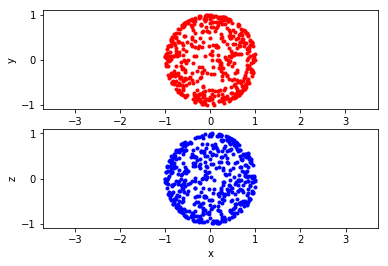

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 500
r = 1

u = np.random.rand(n)
v = np.random.rand(n)

theta = np.arccos(2*u - 1)
phi = 2*np.pi*v

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

plt.subplot(2, 1, 1)
plt.plot(x,y,'r.')
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2,1,2)
plt.plot(x,z,'b.')
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("z")
plt.show()
